Nama: Hafidz Maulana Wicaksono, Email: hafidzmaulana137@gmail.com, username: hafidzmw137, domisili kota : Kota Semarang, Pendidikan Terakhir: S1, Pekerjaan Saat ini: Mahasiswa, Instansi Saat ini: Universitas Negeri Semarang

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Epoch 1/50
42/42 [==============================] - 42s 871ms/step - loss: 1.7162 - accuracy: 0.3554 - val_loss: 1.0979 - val_accuracy: 0.3558
Epoch 2/50
42/42 [==============================] - 36s 858ms/step - loss: 1.0880 - accuracy: 0.3691 - val_loss: 1.0924 - val_accuracy: 0.3970
Epoch 3/50
42/42 [==============================] - 41s 995ms/step - loss: 1.0655 - accuracy: 0.4026 - val_loss: 1.0286 - val_accuracy: 0.4931
Epoch 4/50
42/42 [==============================] - 35s 851ms/step - loss: 0.9970 - accuracy: 0.5213 - val_loss: 0.9893 - val_accuracy: 0.5389
Epoch 5/50
42/42 [==============================] - 36s 864ms/step - loss: 0.9621 - accuracy: 0.5441 - val_loss: 0.9503 - val_accuracy: 0.5481
Epoch 6/50
42/42 [==============================] - 41s 997ms/step - loss: 0.8738 - accuracy: 0.6149 - val_loss: 0.8847 - val_accuracy: 0.6087
Epoch 7/50
42/42 [==============================] - 34s 822

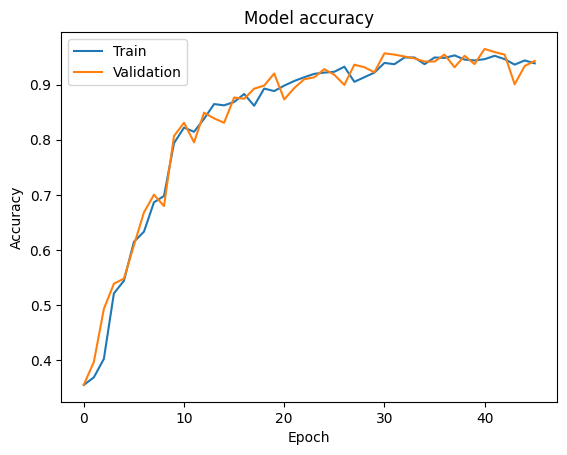

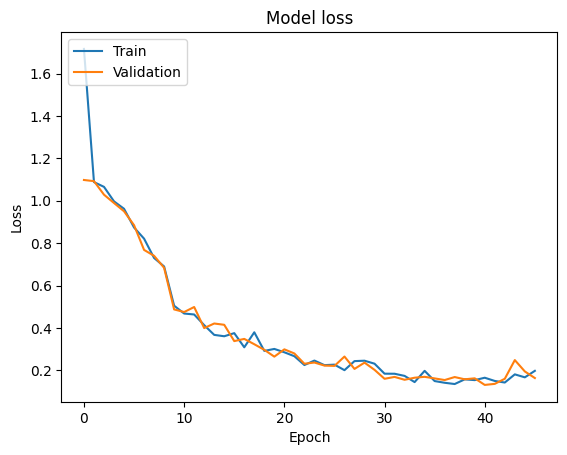

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import os

# Cek apakah dataset sudah ada, jika belum unduh dan ekstraksi dataset
dataset_path = 'rockpaperscissors/rockpaperscissors/rps-cv-images'
if not os.path.exists(dataset_path):
    !wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
    !unzip -q rockpaperscissors.zip -d rockpaperscissors

# Persiapan ImageDataGenerator untuk augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # Pembagian validation set
)

train_dir = dataset_path

# Memuat data train dan validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 200),  # Ukuran gambar yang diharapkan
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Menentukan subset untuk training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 200),  # Ukuran gambar yang diharapkan
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Menentukan subset untuk validation
)

# Membangun model sequential dengan dropout untuk menghindari overfitting
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 200, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Dropout layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Dropout layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Dropout layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Jumlah kelas = 3 (gunting, batu, kertas)
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definisi EarlyStopping untuk membatasi waktu pelatihan
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Pelatihan model dengan batasan waktu 30 menit
history = model.fit(
    train_generator,
    epochs=50,  # Atur jumlah epoch sesuai kebutuhan
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Evaluasi model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Simpan model setelah pelatihan
model.save('rockpaperscissors_model.h5')

Saving WhatsApp Image 2024-06-23 at 11.42.49_59c5041b.jpg to WhatsApp Image 2024-06-23 at 11.42.49_59c5041b.jpg
1/1 [==============================] - 0s 75ms/step


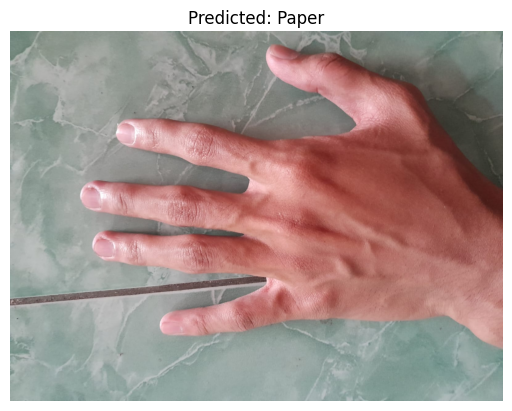

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
model = load_model('/content/rockpaperscissors_model.h5')

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(img_path, target_size=(300, 200)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Mengunggah gambar
uploaded = files.upload()

for img_name in uploaded.keys():
    # Memproses gambar yang diunggah
    img_path = img_name
    img_array = load_and_preprocess_image(img_path, target_size=(300, 200))

    # Melakukan prediksi
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Mapping kelas prediksi ke label
    class_labels = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}
    predicted_label = class_labels[predicted_class]

    # Menampilkan gambar dan hasil prediksi
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()